In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.pipeline import Pipeline

from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

from sklearn.metrics import precision_recall_curve

In [3]:
df_train = pd.read_csv('../data/interim/df_train.csv', index_col='id')
df_contest = pd.read_csv('../data/interim/df_contest.csv', index_col='id')

In [4]:
df_train_fact = pd.read_csv('../data/interim/factor_df_train.csv', index_col='id')
df_contest_fact = pd.read_csv('../data/interim/factor_df_contest.csv', index_col='id')

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55083 entries, 69572 to 26348
Columns: 187 entries, amount_tsh to status_group
dtypes: float64(9), int64(177), object(1)
memory usage: 79.0+ MB


In [6]:
print(df_train.columns.values)

['amount_tsh' 'gps_height' 'longitude' 'latitude' 'num_private'
 'population' 'construction_year' 'basin_Internal' 'basin_Lake Nyasa'
 'basin_Lake Rukwa' 'basin_Lake Tanganyika' 'basin_Lake Victoria'
 'basin_Pangani' 'basin_Rufiji' 'basin_Ruvuma / Southern Coast'
 'basin_Wami / Ruvu' 'region_Arusha' 'region_Dar es Salaam'
 'region_Dodoma' 'region_Iringa' 'region_Kagera' 'region_Kigoma'
 'region_Kilimanjaro' 'region_Lindi' 'region_Manyara' 'region_Mara'
 'region_Mbeya' 'region_Morogoro' 'region_Mtwara' 'region_Mwanza'
 'region_Pwani' 'region_Rukwa' 'region_Ruvuma' 'region_Shinyanga'
 'region_Singida' 'region_Tabora' 'region_Tanga' 'region_code_1'
 'region_code_2' 'region_code_3' 'region_code_4' 'region_code_5'
 'region_code_6' 'region_code_7' 'region_code_8' 'region_code_9'
 'region_code_10' 'region_code_11' 'region_code_12' 'region_code_13'
 'region_code_14' 'region_code_15' 'region_code_16' 'region_code_17'
 'region_code_18' 'region_code_19' 'region_code_20' 'region_code_21'
 'region_

In [7]:
# https://stackoverflow.com/questions/40336502/want-to-know-the-diff-among-pd-factorize-pd-get-dummies-sklearn-preprocessing/40338956

# Prepare Splits

In [8]:
df_train

,amount_tsh,gps_height,longitude,latitude,num_private,population,construction_year,basin_Internal,basin_Lake Nyasa,basin_Lake Rukwa,...,waterpoint_type_other,pump_age_yr,date_recorded_age_yr,lga_freq_encode,funder_freq_encode,ward_freq_encode,installer_freq_encode,subvillage_freq_encode,wpt_name_freq_encode,status_group
id,,,,,,,,,,,,,,,,,,,,,
69572,6000.0,1390,34.938093,-9.856322,0,109,1999,0,1,0,...,0,16,4,0.009666,0.004676,0.000572,0.001602,0.000086,0.062403,functional
8776,500.0,1399,34.698766,-2.147466,0,280,2010,0,0,0,...,0,5,2,0.012555,0.000915,0.001244,0.000715,0.000086,0.013670,functional
34310,25.0,686,37.460664,-3.821329,0,250,2009,0,0,0,...,0,6,2,0.005248,0.000129,0.000186,0.006621,0.008508,0.000043,functional
67743,50.0,263,38.486161,-11.155298,0,58,1986,0,0,0,...,0,29,2,0.003046,0.017517,0.000586,0.003947,0.000315,0.000029,non functional
19728,500.0,1300,31.130847,-1.825359,0,914,2002,0,0,0,...,0,13,4,0.013184,0.000014,0.000200,0.002331,0.000029,0.029171,functional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60739,10.0,1210,37.169807,-3.253847,0,125,1999,0,0,0,...,0,16,2,0.011096,0.010925,0.002145,0.010925,0.000057,0.000014,functional
27263,4700.0,1212,35.249991,-9.070629,0,56,1996,0,0,0,...,0,19,4,0.043384,0.000443,0.000944,0.000229,0.000243,0.000014,functional
37057,500.0,1700,34.017087,-8.750434,0,200,1994,0,0,0,...,0,21,4,0.009252,0.058156,0.001187,0.058527,0.000029,0.000257,functional


In [9]:
y = df_train['status_group']
y.value_counts()

functional        32259
non functional    22824
Name: status_group, dtype: int64

In [10]:
X = df_train[df_train.columns[0:-1].values].copy()

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [12]:
# try with a subset of X

In [13]:
X2 = df_train[[
'amount_tsh', 'gps_height', 'longitude', 'latitude', 'num_private', 'population', 'construction_year', 'basin_Internal', 'basin_Lake Nyasa', 'basin_Lake Rukwa', 'basin_Lake Tanganyika', 'basin_Lake Victoria', 'basin_Pangani', 'basin_Rufiji', 'basin_Ruvuma / Southern Coast', 'basin_Wami / Ruvu', 'region_Arusha', 'region_Dar es Salaam', 'region_Dodoma', 'region_Iringa', 'region_Kagera', 'region_Kigoma', 'region_Kilimanjaro', 'region_Lindi', 'region_Manyara', 'region_Mara', 'region_Mbeya', 'region_Morogoro', 'region_Mtwara', 'region_Mwanza', 'region_Pwani', 'region_Rukwa', 'region_Ruvuma', 'region_Shinyanga', 'region_Singida', 'region_Tabora', 'region_Tanga',

'district_code_0', 'district_code_1', 'district_code_2', 'district_code_3', 'district_code_4', 'district_code_5', 'district_code_6', 'district_code_7', 'district_code_8', 'district_code_13', 'district_code_23', 'district_code_30', 'district_code_33', 'district_code_43', 'district_code_53', 'district_code_60', 'district_code_62', 'district_code_63', 'district_code_67', 'district_code_80',

'scheme_management_Company', 'scheme_management_None', 'scheme_management_Other', 'scheme_management_Parastatal', 'scheme_management_Private operator', 'scheme_management_SWC', 'scheme_management_Trust', 'scheme_management_VWC', 'scheme_management_WUA', 'scheme_management_WUG', 'scheme_management_Water Board', 'scheme_management_Water authority', 'scheme_management_unknown',

'extraction_type_group_afridev', 'extraction_type_group_gravity', 'extraction_type_group_india mark ii', 'extraction_type_group_india mark iii', 'extraction_type_group_mono', 'extraction_type_group_nira/tanira', 'extraction_type_group_other', 'extraction_type_group_other handpump', 'extraction_type_group_other motorpump', 'extraction_type_group_rope pump', 'extraction_type_group_submersible', 'extraction_type_group_swn 80', 'extraction_type_group_wind-powered', 'management_company', 'management_other', 'management_other - school', 'management_parastatal', 'management_private operator', 'management_trust', 'management_unknown', 'management_vwc', 'management_water authority', 'management_water board', 'management_wua', 'management_wug', 'payment_never pay', 'payment_other', 'payment_pay annually', 'payment_pay monthly', 'payment_pay per bucket', 'payment_pay when scheme fails', 'payment_unknown', 'payment_type_annually', 'payment_type_monthly', 'payment_type_never pay', 'payment_type_on failure', 'payment_type_other', 'payment_type_per bucket', 'payment_type_unknown', 'water_quality_coloured', 'water_quality_fluoride', 'water_quality_fluoride abandoned', 'water_quality_milky', 'water_quality_salty', 'water_quality_salty abandoned', 'water_quality_soft', 'water_quality_unknown', 'quality_group_colored', 'quality_group_fluoride', 'quality_group_good', 'quality_group_milky', 'quality_group_salty', 'quality_group_unknown', 'quantity_dry', 'quantity_enough', 'quantity_insufficient', 'quantity_seasonal', 'quantity_unknown', 'source_dam', 'source_hand dtw', 'source_lake', 'source_machine dbh', 'source_other', 'source_rainwater harvesting', 'source_river', 'source_shallow well', 'source_spring', 'source_unknown', 'waterpoint_type_cattle trough', 'waterpoint_type_communal standpipe', 'waterpoint_type_communal standpipe multiple', 'waterpoint_type_dam', 'waterpoint_type_hand pump', 'waterpoint_type_improved spring', 'waterpoint_type_other', 'lga_freq_encode', 'funder_freq_encode', 'ward_freq_encode', 'installer_freq_encode', 'subvillage_freq_encode', 'wpt_name_freq_encode', 'pump_age_yr', 'date_recorded_age_yr'    
]]

In [14]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, test_size = 0.2, random_state = 42)

In [15]:
print(list(X.columns.values))

['amount_tsh', 'gps_height', 'longitude', 'latitude', 'num_private', 'population', 'construction_year', 'basin_Internal', 'basin_Lake Nyasa', 'basin_Lake Rukwa', 'basin_Lake Tanganyika', 'basin_Lake Victoria', 'basin_Pangani', 'basin_Rufiji', 'basin_Ruvuma / Southern Coast', 'basin_Wami / Ruvu', 'region_Arusha', 'region_Dar es Salaam', 'region_Dodoma', 'region_Iringa', 'region_Kagera', 'region_Kigoma', 'region_Kilimanjaro', 'region_Lindi', 'region_Manyara', 'region_Mara', 'region_Mbeya', 'region_Morogoro', 'region_Mtwara', 'region_Mwanza', 'region_Pwani', 'region_Rukwa', 'region_Ruvuma', 'region_Shinyanga', 'region_Singida', 'region_Tabora', 'region_Tanga', 'region_code_1', 'region_code_2', 'region_code_3', 'region_code_4', 'region_code_5', 'region_code_6', 'region_code_7', 'region_code_8', 'region_code_9', 'region_code_10', 'region_code_11', 'region_code_12', 'region_code_13', 'region_code_14', 'region_code_15', 'region_code_16', 'region_code_17', 'region_code_18', 'region_code_19', '

In [16]:
len(X.columns.values)

186

## Prepare Splits - Factorized

In [17]:
X_fact = df_train_fact[df_train_fact.columns[0:-1].values].copy()

In [18]:
y_fact = df_train_fact['status_group']

In [19]:
X_fact_train, X_fact_test, y_fact_train, y_fact_test = train_test_split(X_fact, 
                                                                        y_fact, 
                                                                        test_size = 0.2, 
                                                                        random_state = 42)

## helper functions for modelling

In [112]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [259]:
def getConfusionMatrixP(y_pred, y_test, positive_label):
    '''
    a function to print the confusion matrix, labelled, as a dataframe

    '''
    # labels = np.unique(y_test)     
    labels = np.sort(np.unique(y_test))[::-1]
    desired_labels = []
    desired_labels.append(positive_label)
    
    if labels[0] == positive_label:
        desired_labels.append(labels[1])
    else:
        desired_labels.append(labels[0])
    
    a =  confusion_matrix(y_test, y_pred, labels=desired_labels)
    
    df_cm = pd.DataFrame(a, index=desired_labels, columns=desired_labels)
    df_cm.index.name='Actual'
    return df_cm

In [229]:
def getConfusionMatrix(y_pred, y_test):
    '''
    a function to print the confusion matrix, labelled, as a dataframe
    hard coded to sort descending the columns so that the 'non functional' is reported as positive
    '''
    # labels = np.unique(y_test)  
    labels = np.sort(np.unique(y_test))[::-1]
        
    a =  confusion_matrix(y_test, y_pred, labels=labels)
    
    df_cm = pd.DataFrame(a, index=labels, columns=labels)
    df_cm.index.name='Actual'
    return df_cm

In [252]:
def getNegativeLabel(df_conf_matrix, positive_label):
    '''
    helper function to get the negative column
    '''
    
    conf_cols = list(df_conf_matrix.columns)
    
    if conf_cols[0] == positive_label:
        negative_label = conf_cols[1]
    else:
        negative_label = conf_cols[0]
        
    return negative_label 

In [251]:
def getRecall(df_conf_matrix, positive_label):   
   
    negative_label = getNegativeLabel(df_conf_matrix, positive_label)

    tp = df_conf_matrix[positive_label][0] # left, top
    fn = df_conf_matrix[negative_label][0] # right, top
        
    recall = tp / (tp + fn)
    return recall

In [253]:
def getPrecision(df_conf_matrix, positive_label):

    negative_label = getNegativeLabel(df_conf_matrix, positive_label)

    tp = df_conf_matrix[positive_label][0] # left, top 
    fp = df_conf_matrix[positive_label][1] # left, bottom 
    
    precision = tp / (tp + fp)
    return precision

def getSpecificity(df_conf_matrix, positive_label):
    
    negative_label = getNegativeLabel(df_conf_matrix, positive_label)
    
    fn = df_conf_matrix[negative_label][0] # right, top
    tn = df_conf_matrix[negative_label][1] # right, bottom
        
    spec = tn / (fn + tn)
    return spec

In [248]:
df_conf_matrix2 = getConfusionMatrixP(y_pred, y_test, positive_label='non functional')
list(df_conf_matrix2.columns)

['non functional', 'functional']

In [148]:
X_train.columns

Index(['amount_tsh', 'gps_height', 'longitude', 'latitude', 'num_private',
       'population', 'construction_year', 'basin_Internal', 'basin_Lake Nyasa',
       'basin_Lake Rukwa',
       ...
       'waterpoint_type_improved spring', 'waterpoint_type_other',
       'pump_age_yr', 'date_recorded_age_yr', 'lga_freq_encode',
       'funder_freq_encode', 'ward_freq_encode', 'installer_freq_encode',
       'subvillage_freq_encode', 'wpt_name_freq_encode'],
      dtype='object', length=186)

# Classification Modeling

## 1A: k Nearest Neighbors,  kNN w/ single model score¶
KNN model attempt

In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing

knn = KNeighborsClassifier(n_neighbors=37)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.7102659526186802

In [22]:
y_pred = knn.predict(X_test)

In [254]:
getConfusionMatrixP(y_pred, y_test, positive_label='non functional')

,non functional,functional
Actual,,
non functional,2347,2111
functional,1081,5478


In [256]:
print(classification_report(y_test, y_pred))

                precision    recall  f1-score   support

    functional       0.72      0.84      0.77      6559
non functional       0.68      0.53      0.60      4458

      accuracy                           0.71     11017
     macro avg       0.70      0.68      0.68     11017
  weighted avg       0.71      0.71      0.70     11017



In [261]:
# precision tp / (tp + fp)
precision_knn = getPrecision(getConfusionMatrixP(y_pred, y_test, 'non functional'),'non functional')
print('Precision: %f' % precision_knn )

Precision: 0.684656


In [262]:
# recall: tp / (tp + fn)
recall_knn = getRecall(getConfusionMatrixP(y_pred, y_test, 'non functional'),'non functional')
print('Recall: %f' % recall_knn)

Recall: 0.526469


In [265]:
# Compute predicted probabilities: y_pred_prob
y_pred_prob = knn.predict_proba(X_test)[:,1]
y_pred_prob

array([0.32432432, 0.56756757, 0.64864865, ..., 0.91891892, 0.40540541,
       0.24324324])

In [264]:
knn.classes_

array(['functional', 'non functional'], dtype=object)

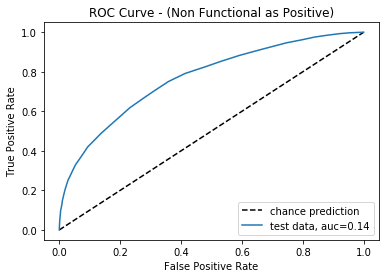

In [268]:
# Compute predicted probabilities: y_pred_prob
y_pred_prob = knn.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_true=y_test, y_score=y_pred_prob, pos_label='non functional')
auc = metrics.roc_auc_score(y_test, y_pred_proba)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--', label='chance prediction')
plt.plot(fpr, tpr, label="test data, auc="+str(round(auc,2)))

plt.legend(loc=4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - (Non Functional as Positive)')
plt.show()

Text(0.5, 1.0, '2-class Precision-Recall curve: Avg Prec=0.88')

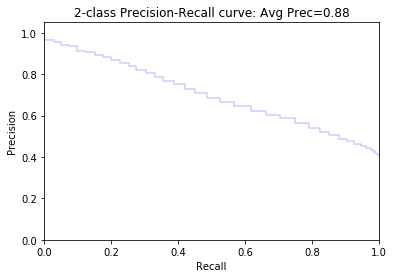

In [270]:
precision, recall, _ = precision_recall_curve(y_test, y_pred_prob, pos_label='non functional')

plt.step(recall, precision, color='b', alpha=0.2, where='post')

# plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: Avg Prec={0:0.2f}'.format(average_precision))

## 1B kNN w subset

In [25]:
knn2 = KNeighborsClassifier(n_neighbors=37)
knn2.fit(X2_train, y2_train)
knn2.score(X2_test, y2_test)

0.7107197966778614

## 2A : Random Forest Classifier

In [26]:
rfc = RandomForestClassifier(max_depth=6, random_state=42, n_estimators=1000)
rfc.fit(X_train, y_train)

# score on new data
rfc.score(X_test, y_test)

0.7911409639647817

In [27]:
y_pred_rfc = rfc.predict(X_test)

In [271]:
getConfusionMatrixP(y_pred_rfc, y_test, 'non functional')

,non functional,functional
Actual,,
non functional,2448,2010
functional,291,6268


In [272]:
print(classification_report(y_test, y_pred_rfc))

                precision    recall  f1-score   support

    functional       0.76      0.96      0.84      6559
non functional       0.89      0.55      0.68      4458

      accuracy                           0.79     11017
     macro avg       0.83      0.75      0.76     11017
  weighted avg       0.81      0.79      0.78     11017



In [274]:
getPrecision(getConfusionMatrixP(y_pred_rfc, y_test, 'non functional'),'non functional')

0.8937568455640745

In [275]:
getRecall(getConfusionMatrixP(y_pred_rfc, y_test, 'non functional'),'non functional')

0.5491251682368775

In [276]:
getSpecificity(getConfusionMatrixP(y_pred_rfc, y_test, 'non functional'),'non functional')

0.7571877265039865

In [193]:
rfc_feat_importances = rfc.feature_importances_
len(rfc_feat_importances)


186

In [194]:
len(df_train.columns.values)

187

In [195]:
rfc_coef = pd.DataFrame({'feature importances': rfc_feat_importances, 'feature': list(X.columns.values)}, columns=['feature importances', 'feature'])
rfc_coef.sort_values('feature importances', ascending=False).head(30)

,feature importances,feature
156,0.189282,quantity_dry
177,0.103438,waterpoint_type_other
109,0.080915,extraction_type_group_other
157,0.070841,quantity_enough
178,0.051471,pump_age_yr
6,0.048055,construction_year
0,0.039652,amount_tsh
172,0.023054,waterpoint_type_communal standpipe
137,0.022864,payment_type_never pay
128,0.022095,payment_never pay


In [196]:
rfc.predict_proba(X_test)

array([[0.33484104, 0.66515896],
       [0.60392996, 0.39607004],
       [0.65945719, 0.34054281],
       ...,
       [0.21088616, 0.78911384],
       [0.52748038, 0.47251962],
       [0.65084842, 0.34915158]])

In [197]:
rfc.classes_
# functional is the first column!

array(['functional', 'non functional'], dtype=object)

In [281]:
rfc.predict_proba(X_test)

array([[0.33484104, 0.66515896],
       [0.60392996, 0.39607004],
       [0.65945719, 0.34054281],
       ...,
       [0.21088616, 0.78911384],
       [0.52748038, 0.47251962],
       [0.65084842, 0.34915158]])

In [277]:
y_pred_prob = rfc.predict_proba(X_test)[:,1]
y_pred_prob

array([0.66515896, 0.39607004, 0.34054281, ..., 0.78911384, 0.47251962,
       0.34915158])

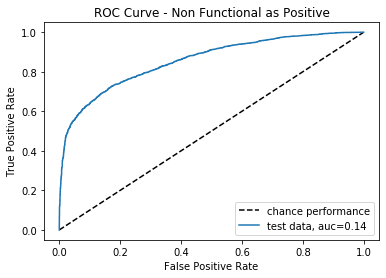

In [280]:
# Compute predicted probabilities: y_pred_prob
y_pred_prob = rfc.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_true=y_test, y_score=y_pred_prob, pos_label='non functional')
auc = metrics.roc_auc_score(y_test, y_pred_proba, labels=['non functional', 'functional'])

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--', label='chance performance')

plt.plot(fpr, tpr, label="test data, auc="+str(round(auc, 2)))

#plt.plot(fpr, tpr, label="test data")

plt.legend(loc=4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Non Functional as Positive')
plt.show()


In [279]:
from sklearn.metrics import average_precision_score, auc, roc_curve, precision_recall_curve
average_precision = average_precision_score(y_test, y_pred_prob, pos_label='non functional')


print('Average precision-recall score RF: {}'.format(average_precision))

Average precision-recall score RF: 0.8342467058859206


Text(0.5, 1.0, '2-class Precision-Recall curve: Avg Prec=0.83')

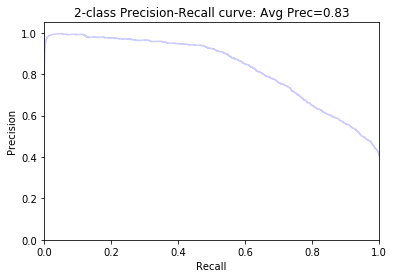

In [282]:
# Compute predicted probabilities: y_pred_prob
y_pred_prob = rfc.predict_proba(X_test)[:,1]

precision, recall, _ = precision_recall_curve(y_test, y_pred_prob, pos_label='non functional')

plt.step(recall, precision, color='b', alpha=0.2, where='post')

# plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: Avg Prec={0:0.2f}'.format(average_precision))

# 2B Random Forest Classifier - Factorized

In [33]:
rfc2B = RandomForestClassifier(max_depth=6, random_state=42, n_estimators=1000)
rfc2B.fit(X_fact_train, y_fact_train)

# score on new data
rfc2B.score(X_fact_test, y_fact_test)

0.7893255877280566

In [34]:
len(rfc2B.feature_importances_), len(X_fact.columns.values)

(31, 31)

In [35]:
rfc2B_feat_importances = rfc2B.feature_importances_
rfc2B_coef = pd.DataFrame({'feature importances': rfc2B_feat_importances, 'feature': list(X_fact.columns.values)}, columns=['feature importances', 'feature'])
rfc2B_coef.sort_values('feature importances', ascending=False).head(30)

,feature importances,feature
27,0.261708,quantity_factorize
29,0.129522,waterpoint_type_factorize
21,0.110492,extraction_type_group_factorize
9,0.078729,pump_age_yr
8,0.074043,construction_year
0,0.050452,amount_tsh
23,0.029701,payment_factorize
24,0.029592,payment_type_factorize
16,0.024612,region_factorize
28,0.024242,source_factorize


# 3A Random Forest Classifier w/ CV = 5

In [36]:
rfc3A = RandomForestClassifier(max_depth=6, random_state=42, n_estimators=1000)
cv_scores_rfc3A = cross_val_score(rfc3A,X,y,cv=5)

In [37]:
print(cv_scores_rfc3A)

[0.78714714 0.78061178 0.7884179  0.7855846  0.7931191 ]


In [38]:
print(np.mean(cv_scores_rfc3A))

0.7869761042698322


# 3B Random Forest Classifier w/ CV - Factorized

In [39]:
rfc3B = RandomForestClassifier(max_depth=6, random_state=42, n_estimators=1000)
cv_scores_rfc3B = cross_val_score(rfc3B,X_fact,y_fact,cv=5)

In [40]:
print(cv_scores_rfc3B)

[0.78832713 0.77471181 0.782881   0.78331518 0.7864016 ]


In [41]:
print(np.mean(cv_scores_rfc3B))

0.7831273435014178


## ==========================
## helper function for top N features, threshold features

In [42]:
from sklearn.feature_selection import SelectFromModel

# feature selection
def select_features_threshold(X_train, y_train, X_test, threshold_pct):
    # configure to select a subset of features
    fs = SelectFromModel(RandomForestClassifier(max_depth=6, random_state=42, n_estimators=1000), threshold=threshold_pct)
    
    # learn relationship from training data
    fs.fit(X_train, y_train)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

In [43]:
from sklearn.feature_selection import SelectFromModel

# feature selection
def select_features_topN(X_train, y_train, X_test, topN):
    # configure to select a subset of features
    fs = SelectFromModel(RandomForestClassifier(max_depth=6, random_state=42, n_estimators=1000), max_features=topN)
    
    # learn relationship from training data
    fs.fit(X_train, y_train)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

# 4A Random Forest Classifier w/ Threshold 0.05 - One-Hot / Frequency Encoded

In [44]:
# feature selection
X_train_fs, X_test_fs, fs_rfc = select_features_threshold(X_train, y_train, X_test, threshold_pct=0.05)

In [45]:
feature_idx_rfc = fs_rfc.get_support()

feature_name_rfc = X_train.columns[feature_idx_rfc]
feature_name_rfc

Index(['extraction_type_group_other', 'quantity_dry', 'quantity_enough',
       'waterpoint_type_other', 'pump_age_yr'],
      dtype='object')

In [46]:
rfc_fs = RandomForestClassifier(max_depth=6, random_state=42, n_estimators=1000)

In [47]:
rfc_fs.fit(X_train_fs, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=6, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [48]:
rfc_fs.score(X_test_fs, y_test)

0.7640918580375783

In [49]:
y_pred_rfc_fs = rfc_fs.predict(X_test_fs)

In [283]:
getConfusionMatrixP(y_pred_rfc_fs, y_test, positive_label='non functional')

,non functional,functional
Actual,,
non functional,2262,2196
functional,403,6156


In [284]:
getPrecision(getConfusionMatrixP(y_pred_rfc_fs, y_test, 'non functional'),'non functional')

0.848780487804878

In [286]:
getRecall(getConfusionMatrixP(y_pred_rfc_fs, y_test, 'non functional'),'non functional')

0.5074024226110363

In [287]:
print(classification_report(y_test, y_pred_rfc_fs))

                precision    recall  f1-score   support

    functional       0.74      0.94      0.83      6559
non functional       0.85      0.51      0.64      4458

      accuracy                           0.76     11017
     macro avg       0.79      0.72      0.73     11017
  weighted avg       0.78      0.76      0.75     11017



# 4B Random Forest Classifier w/ threshold features 0.05 - Factorized

In [52]:
# feature selection
X_fact_train_fs, X_fact_test_fs, fs_fact_rfc = select_features_threshold(X_fact_train, 
                                                               y_fact_train, 
                                                               X_fact_test, 
                                                               threshold_pct=0.05)

In [53]:
feature_idx_rfc_fact = fs_fact_rfc.get_support()
feature_name_rfc_fact = X_fact_train.columns[feature_idx_rfc_fact]
feature_name_rfc_fact

Index(['amount_tsh', 'construction_year', 'pump_age_yr',
       'extraction_type_group_factorize', 'quantity_factorize',
       'waterpoint_type_factorize'],
      dtype='object')

In [54]:
rfc_fact_fs = RandomForestClassifier(max_depth=6, random_state=42, n_estimators=1000, max_features=6)

In [55]:
rfc_fact_fs.fit(X_fact_train_fs, y_fact_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=6, max_features=6,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [56]:
rfc_fact_fs.score(X_fact_test_fs, y_fact_test)

0.7739856585277298

In [57]:
y_pred_rfc_fact_fs = rfc_fact_fs.predict(X_fact_test_fs)

In [288]:
getConfusionMatrix(y_pred_rfc_fact_fs, y_fact_test)

,non functional,functional
Actual,,
non functional,2305,2153
functional,337,6222


In [289]:
getPrecision(getConfusionMatrixP(y_pred_rfc_fs, y_test, 'non functional'),'non functional')

0.848780487804878

In [290]:
getRecall(getConfusionMatrixP(y_pred_rfc_fs, y_test, 'non functional'),'non functional')

0.5074024226110363

In [291]:
print(classification_report(y_fact_test, y_pred_rfc_fact_fs))

                precision    recall  f1-score   support

    functional       0.74      0.95      0.83      6559
non functional       0.87      0.52      0.65      4458

      accuracy                           0.77     11017
     macro avg       0.81      0.73      0.74     11017
  weighted avg       0.80      0.77      0.76     11017



# 5B Random Forest Classifier w/ Top 18 Features (via 0.01) - Factorized

In [60]:
# feature selection
X_fact_topN_train_fs, X_fact_topN_test_fs, fs_fact_topN_rfc = select_features_threshold(X_fact_train, y_fact_train, X_fact_test, 0.01)

In [61]:
feature_idx_rfc_fact_topN = fs_fact_topN_rfc.get_support()

feature_name_rfc_fact_topN = X_fact_train.columns[feature_idx_rfc_fact_topN]
feature_name_rfc_fact_topN

Index(['amount_tsh', 'gps_height', 'longitude', 'latitude', 'region_code',
       'construction_year', 'pump_age_yr', 'region_factorize', 'lga_factorize',
       'scheme_management_factorize', 'extraction_type_group_factorize',
       'management_factorize', 'payment_factorize', 'payment_type_factorize',
       'water_quality_factorize', 'quality_group_factorize',
       'quantity_factorize', 'source_factorize', 'waterpoint_type_factorize'],
      dtype='object')

In [62]:
rfc_fact_topN_fs = RandomForestClassifier(max_depth=6, random_state=42, n_estimators=1000, max_features=18)

In [63]:
rfc_fact_topN_fs.fit(X_fact_topN_train_fs, y_fact_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=6, max_features=18,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [64]:
rfc_fact_topN_fs.score(X_fact_topN_test_fs, y_fact_test)

0.77834256149587

In [65]:
y_pred_rfc_fact_topN_fs = rfc_fact_topN_fs.predict(X_fact_topN_test_fs)

In [292]:
getConfusionMatrix(y_pred_rfc_fact_topN_fs, y_fact_test)

,non functional,functional
Actual,,
non functional,2405,2053
functional,389,6170


In [67]:
print(classification_report(y_fact_test, y_pred_rfc_fact_topN_fs))

                precision    recall  f1-score   support

    functional       0.75      0.94      0.83      6559
non functional       0.86      0.54      0.66      4458

      accuracy                           0.78     11017
     macro avg       0.81      0.74      0.75     11017
  weighted avg       0.80      0.78      0.77     11017



In [294]:
getPrecision(getConfusionMatrixP(y_pred_rfc_fact_topN_fs, y_fact_test, 'non functional'),'non functional')

0.860773085182534

In [295]:
getRecall(getConfusionMatrixP(y_pred_rfc_fact_topN_fs, y_fact_test, 'non functional'),'non functional')

0.5394795872588605

In [138]:
# Compute predicted probabilities: y_pred_prob
y_pred_prob = rfc_fact_topN_fs.predict_proba(X_fact_topN_test_fs)[:,0]
y_pred_prob

array([0.00916188, 0.58085415, 0.71027993, ..., 0.03778865, 0.41999948,
       0.70124335])

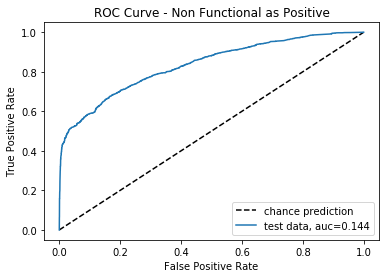

In [296]:
# Compute predicted probabilities: y_pred_prob
y_pred_prob = rfc_fact_topN_fs.predict_proba(X_fact_topN_test_fs)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_true=y_fact_test, y_score=y_pred_prob, pos_label='non functional')
auc = metrics.roc_auc_score(y_test, y_pred_proba)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--', label='chance prediction')
# plt.plot(fpr, tpr, label="model")
plt.plot(fpr, tpr, label="test data, auc="+str(round(auc,3)))
plt.legend(loc=4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Non Functional as Positive')
plt.show()